In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LassoLars
%matplotlib inline

In [3]:
df_test = pd.read_csv('./datasets/test.csv')
df_train = pd.read_csv('./datasets/train.csv')
print ("Train data shape:", df_train.shape)
print ("Test data shape:", df_test.shape)

Train data shape: (2051, 81)
Test data shape: (879, 80)


In [3781]:
df_train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [3782]:
df_train.shape

(2051, 81)

In [3783]:
df_train['Utilities'].isnull().sum()

0

# Cleaning the data

In [3785]:
#dropping NaN values from 3 columns with highest correlation with y
df_train = df_train.dropna(subset=['Total Bsmt SF','Garage Cars','Garage Area'])
df_train.shape

(2049, 81)

In [3786]:
df_train['Gr Liv Area * Total Bsmt SF'] = df_train['Gr Liv Area']*df_train['Total Bsmt SF']
df_test['Gr Liv Area * Total Bsmt SF'] = df_test['Gr Liv Area']*df_test['Total Bsmt SF']

In [3787]:
features = ['Overall Qual','Gr Liv Area','Total Bsmt SF','1st Flr SF',
            'Garage Cars','Garage Area','TotRms AbvGrd','Lot Area',
            'Gr Liv Area * Total Bsmt SF','Kitchen AbvGr','Bedroom AbvGr']

In [3788]:
df_train.shape, df_test.shape

((2049, 82), (879, 81))

In [3789]:
#df_train.columns

# Creating Dummies

In [3790]:
dummies_train = pd.get_dummies(df_train[['Exter Qual','Exter Cond']], drop_first= True)
dummies_test = pd.get_dummies(df_test[['Exter Qual','Exter Cond']], drop_first= True)
dummies_train.shape,dummies_test.shape

((2049, 7), (879, 7))

# Adding the dummies to the train and test sets

In [3791]:
df_train = pd.concat([df_train, dummies_train], axis=1)
df_test = pd.concat([df_test, dummies_test], axis=1)

In [3792]:
df_train.shape,df_test.shape

((2049, 89), (879, 88))

In [3795]:
X = df_train[features]

In [3796]:
y=df_train['SalePrice']

In [3797]:
X.isnull().sum().sum(),y.isnull().sum()

(0, 0)

# Spliting the train and test datasets

In [3798]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42)

# Performing the linear regression

In [3800]:
model = LinearRegression()
model.fit(X_train,y_train)
preds_train = model.predict(X_train)

In [3801]:
cross_val_score(model, X_train, y_train, cv=5) # train corr with valid ?

array([0.82689173, 0.80203761, 0.77780953, 0.7832674 , 0.70941034])

In [3802]:
x_test = df_test[features] #x_test = pd.DataFrame(x_test)

In [3803]:
preds_test = model.predict(x_test)

In [3804]:
np.mean(preds_test)

179378.13376900836

In [3805]:
# Compute the root-mean-square for predict vs actual y value
rms = np.sqrt(mean_squared_error(y_train, preds_train))
rms

35294.94753047153

In [3812]:
resid = preds_train - y_train

In [3813]:
submission = pd.DataFrame(df_test['Id'])
submission['SalePrice'] = preds_test
submission.to_csv('sub6.csv', index = False)

# Predicted vs. actual prices 

([<matplotlib.axis.YTick at 0x1428f48d0>,
 <a list of 3 Text yticklabel objects>)

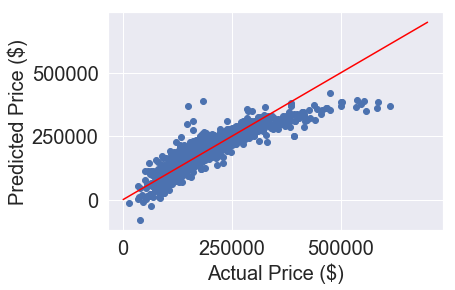

In [3858]:
plt.scatter(y_train,preds_train)
plt.plot(list(range(0,700000,1000)),
        list(range(0,700000,1000)),color='red'
        )
plt.xlabel('Actual Price ($)',size=20,fontdict=None)
plt.ylabel('Predicted Price ($)',size=20,fontdict=None)
plt.xticks(np.arange(0, 600000, 250000),size=20) 
plt.yticks(np.arange(0, 600000, 250000),size=20) 

In [3815]:
y_train.shape


(1536,)

# Predicted prices vs. Residuals

([<matplotlib.axis.YTick at 0x142865c88>,
 <a list of 3 Text yticklabel objects>)

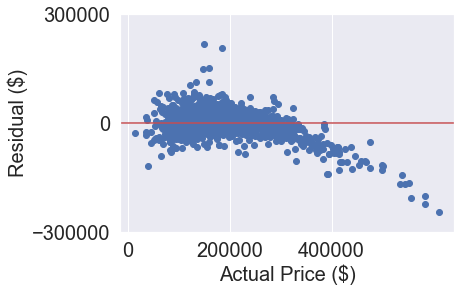

In [3896]:
plt.scatter(y_train, resid)
plt.axhline(y=0.5, color='r', linestyle='-')
plt.xlabel('Actual Price ($)',size=20,fontdict=None)
plt.ylabel('Residual ($)',size=20,fontdict=None)
plt.xticks(np.arange(0, 600000, 200000),size=20) 
plt.yticks(np.arange(-300000, 400000, 300000),size=20) 